# Random Forest

In this lab you will learn the most important aspects of the random forest learning method. 
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import RandomForestClassifier.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def accuracy(preds, actual):
    correct_preds = sum(preds==actual) #Get the total number of correct preds
    return correct_preds/len(preds)

In [3]:
from sklearn.datasets import make_classification, make_regression

## Data Creation

First of all, we create a data set containing 1000 samples with 2 features and two classes:

In [4]:
X, y = make_classification(n_samples = 1000,n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

<b>Exercise 1:</b>

Visualize the data set. It should look like this:
<img src="figures/dataset.png" width="600"/>

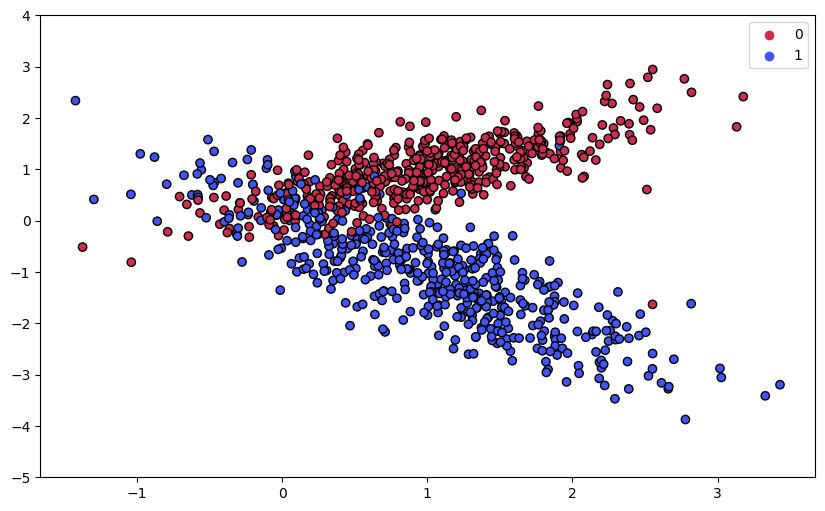

In [5]:
fig, axs = plt.subplots(figsize = (10,6))
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y, legend = True, ax = axs, palette=['#CE2D4F','#4056F4'], edgecolor = 'black', alpha = 1, linewidth = 1)
axs.set_ylim([-2,4])
axs.set_ylim([-5,4])
plt.show()

<b>Exercise 2:</b>
We split our data into train and test data. Then we can train our model (a random forest) on the train data and evaluate the model on the hold out test data. We split the data in a way that we train our model on 67% of the data and test our model on 33% of the data.

In [6]:
from sklearn.model_selection import train_test_split
# The split has shuffle as true, this wouldn't make sense for the stock market or time series data.
# In general it's a good idea to shuffle
# Like if all first part of dataset we have 0's and later 1's then the model will overfit the data and any first given data will be 0's
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

Train a random forest on the training data and report the accuracy for this model on the train and test data using the default parameters of a random forest (from sklearn). What can you conclude from this? .

In [15]:
clf = RandomForestClassifier()

clf.fit(X_train, y_train)
clf.score(X_train,y_train)
preds = clf.predict(X_test)
accuracy(preds,y_test)

0.9303030303030303

## Decision Boundary

Sometimes it is helpful to plot the decision boundary for a learned model. To do so, we create a grid of data points and calculate the probability of belonging to class 1. 
(This can only be done once we have trained the random forest classifier)

In [14]:
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
h = .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

Then we can plot the boundary using the 'contourf' function of matplotlib.

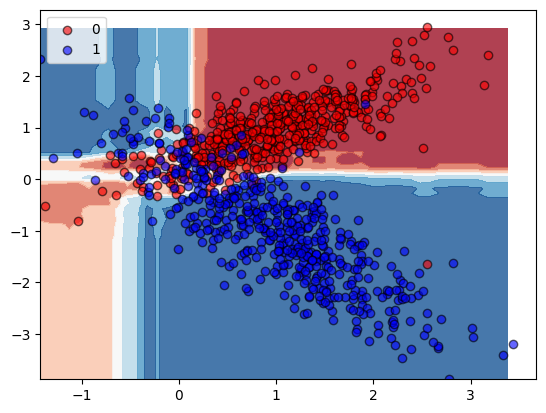

In [95]:
cm = plt.cm.RdBu  # color map not that meaningful for more than 2 or 3 plots.
plt.contourf(xx, yy, Z, alpha=.8, cmap=cm)
colors = ['red','blue']
for cur_class in [0,1]:
    plt.scatter(X[y==cur_class, 0], X[y == cur_class, 1], c=colors[cur_class],
                       edgecolors='k', alpha=0.6, label=cur_class)
plt.legend()
plt.show()

What can you conclude from the figure above?

- The model performs good, but there are around 10 or so misclassifications
- The lighter shades represent class prediction percentage

## Parameter Selection

The implementation of the random forest algorithm in sklearn has many parameter. The most important ones are the number of trees used (n_estimators) and the maximal depth of a single tree (max_depth). Investigate how the number of used trees effects the training and testing accuracy.

<b>Exercise 3:</b>

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 20) used. This plot should look like this:
<img src="figures/num_trees.png" width="600"/>

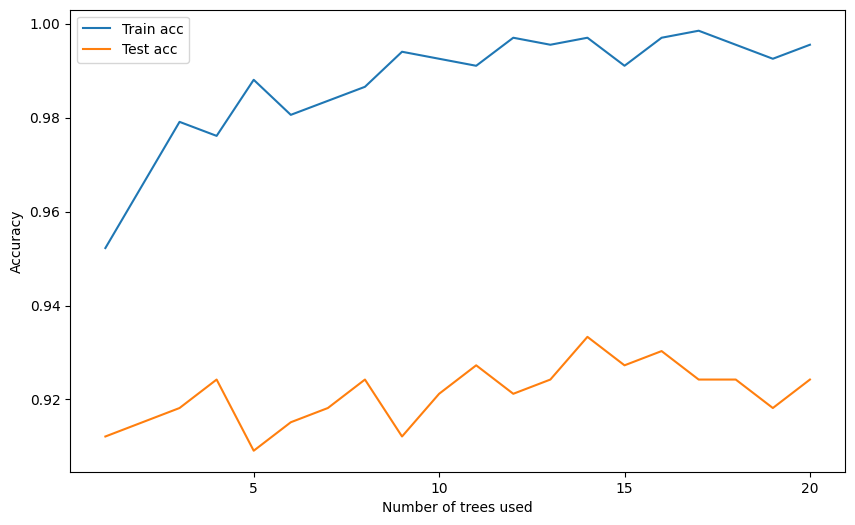

In [200]:
def generate_plot(data,n_trees):
    X_train,X_test,y_train,y_test = data
    hist = []
    steps  = n_trees +1
    for i in range(1,steps):
        clf = RandomForestClassifier(n_estimators=i)
        clf.fit(X_train, y_train)
        train_accuracy = accuracy(clf.predict(X_train),y_train)
        test_accuracy = accuracy(clf.predict(X_test),y_test)
        hist.append([train_accuracy, test_accuracy])
    hist = np.array(hist)

    fig,ax = plt.subplots(figsize = (10,6))

    # Setting the ticks
    ax.set_xticks(list(range(0,steps,5)))
    ax.set_yticks([0.88+x/100 for x in range(0,14,2)])

    # Making the plot
    sns.lineplot(x=list(range(1,steps,1)), y = hist[:,0],label = 'Train acc',legend=True, ax = ax)
    sns.lineplot(x=list(range(1,steps,1)), y = hist[:,1],label = 'Test acc',legend = True, ax = ax)

    # Setting the axes Labels
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("Number of trees used")
    plt.show()
    
generate_plot(train_test_split(X, y, test_size=.33, random_state=42),n_trees = 20)

<b>Optional:</b>

We want to further investigate how the number of used trees effects the training and testing accuracy. 
We want to increase the number of trees to a maximum of 50.

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 50) used.

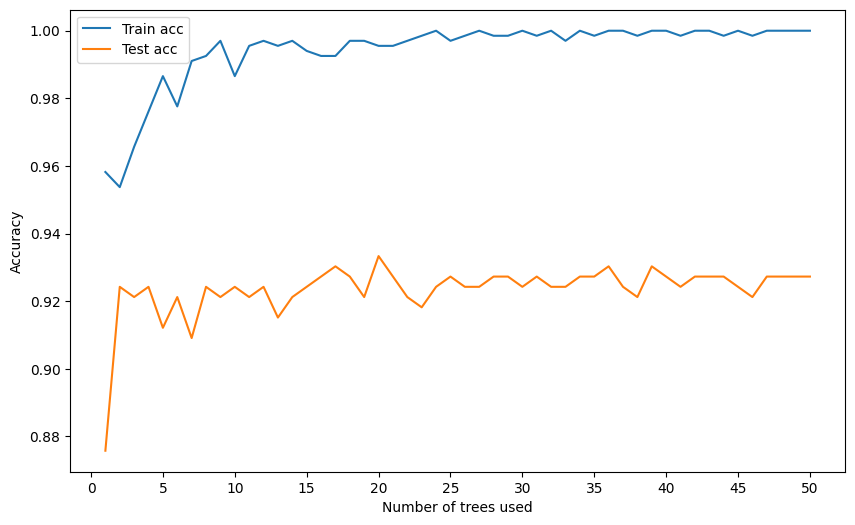

In [167]:
generate_plot(n_trees = 50)

<b>Exercise 4:</b>

We saw how the number of trees influences training and testing accuracy. 
Now we do same thing for the other important parameter max_depth.
Train multiple models with different depths. 
The models should use 30 trees as estimators.

Plot a diagram that shows the training and testing accuracy depending on the maximal depth of a single tree (from 1 to 50). 
This plot should look like this:
<img src="figures/max_depth.png" width="600"/>

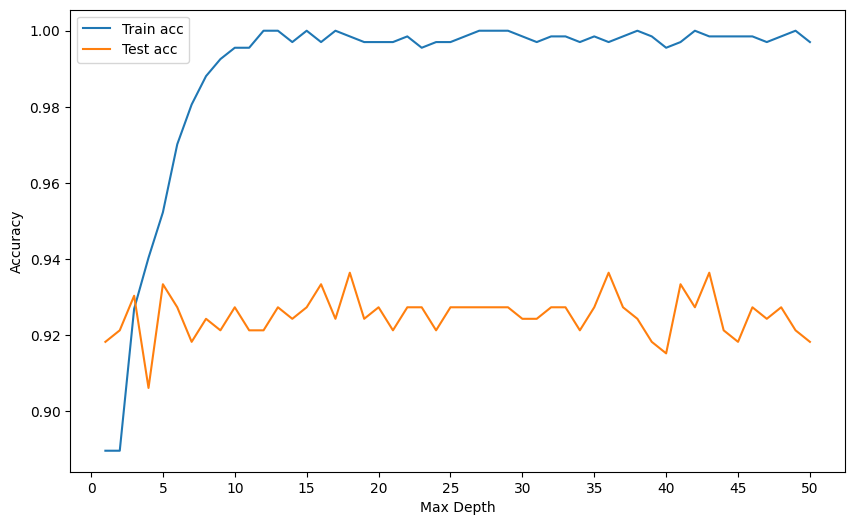

In [16]:
def generate_plot(data,depth):
    X_train,X_test,y_train,y_test = data
    hist = []
    steps  = depth +1
    for i in range(1,steps):
        clf = RandomForestClassifier(n_estimators = 30, max_depth=i)
        clf.fit(X_train, y_train)
        train_accuracy = accuracy(clf.predict(X_train),y_train)
        test_accuracy = accuracy(clf.predict(X_test),y_test)
        hist.append([train_accuracy, test_accuracy])
    hist = np.array(hist)

    fig,ax = plt.subplots(figsize = (10,6))

    # Setting the ticks
    ax.set_xticks(list(range(0,steps,5)))
    ax.set_yticks([0.88+x/100 for x in range(0,14,2)])

    # Making the plot
    sns.lineplot(x=list(range(1,steps,1)), y = hist[:,0],label = 'Train acc',legend=True, ax = ax)
    sns.lineplot(x=list(range(1,steps,1)), y = hist[:,1],label = 'Test acc',legend = True, ax = ax)

    # Setting the axes Labels
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("Max Depth")
    plt.show()

generate_plot(train_test_split(X, y, test_size=.33, random_state=42),depth = 50)

## Churn Data Set
Lets revisit the churn data set from the first tutorial.

In [288]:
churn_df = pd.read_csv('telecom_churn.csv')
label = churn_df['Churn']
churn_df = churn_df.drop(columns=['Churn'])

In [289]:
churn_df.shape

(3333, 19)

<b>Exercise 5:</b>

Create a data set containing only the numeric values. <b>Optional:</b> Try to convert all non numeric values to numeric values using a one hot encoding or by binning them. 

In [290]:
churn_df_numeric = churn_df.select_dtypes(include=['int64', 'float64'])
churn_df_obj = churn_df.select_dtypes(exclude = ['int64', 'float64'])

In [291]:
churn_df_obj.loc[:,['State', 'International plan', 'Voice mail plan']].nunique()

State                 51
International plan     2
Voice mail plan        2
dtype: int64

In [292]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output = False)
churn_df_obj_OH = pd.DataFrame(OH_encoder.fit_transform(churn_df_obj))


# One-hot encoding removed index; put it back
churn_df_obj_OH.index = churn_df_obj.index

# Add one-hot encoded columns to numerical features
churn_OH_encoded = pd.concat([churn_df_numeric,churn_df_obj_OH], axis=1)

# Ensure all columns have string type
churn_OH_encoded.columns = churn_OH_encoded.columns.astype(str)
#OH_X_valid.columns = OH_X_valid.columns.astype(str)

churn_OH_encoded

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,45,46,47,48,49,50,51,52,53,54
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


<b>Exercise 6:</b>

Train a model on this data set and visualize the most important features in a figure. This should look like this (The scaling and order of features can be different):
<img src="figures/importance.png" width="600"/>

<b>Hint</b>: The method feature_importance_ should be used.
What can you conclude?

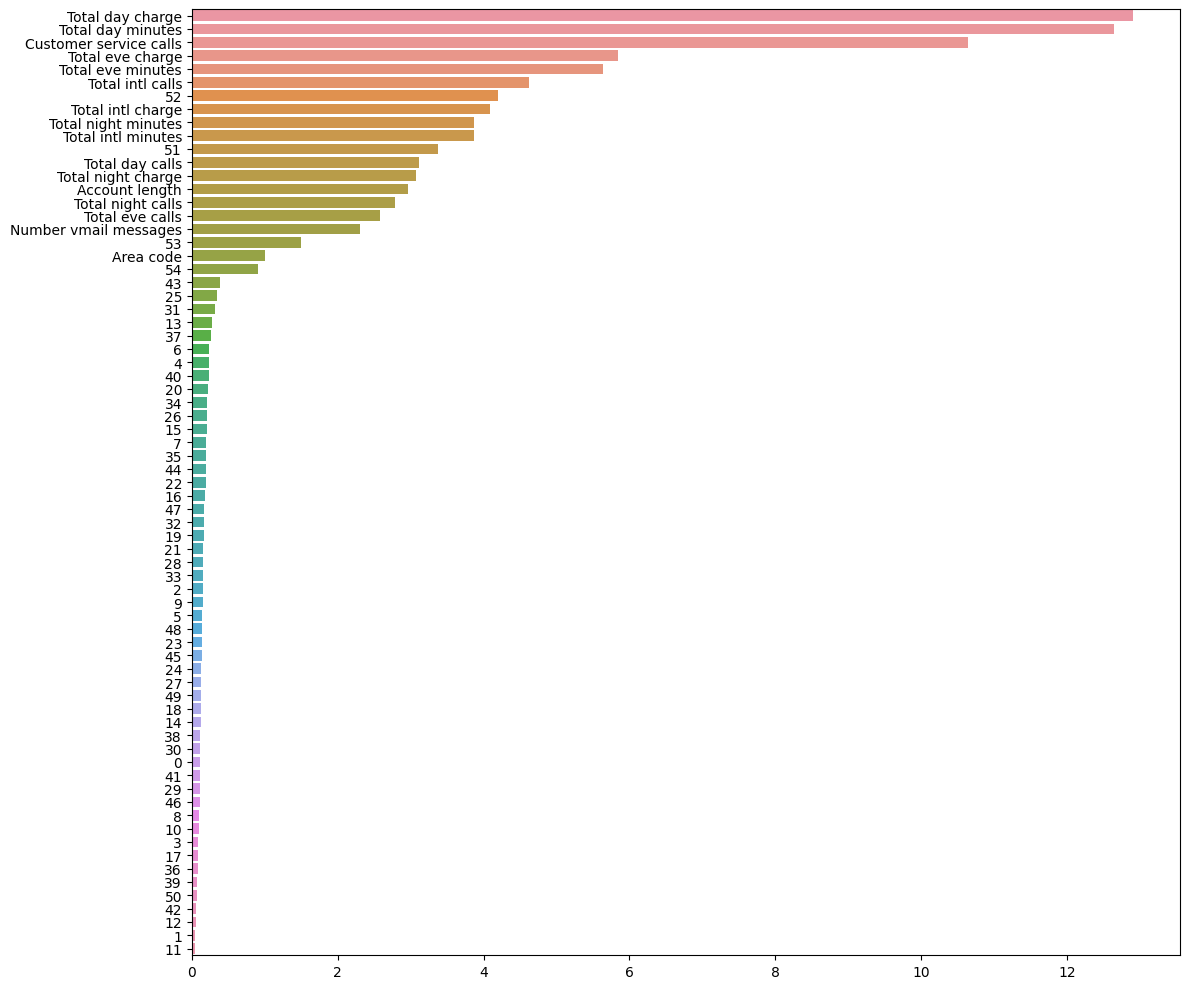

In [293]:
def feature_imp_plot(data,labels):
    X_train, X_test, y_train,y_test = train_test_split(data, labels, test_size = 0.25, random_state=42)
    clf = RandomForestClassifier(n_estimators=30, max_depth = 30)
    clf.fit(churn_OH_encoded,label)
    accuracy(clf.predict(X_test),y_test)
    imp_features = np.array((clf.feature_importances_))*100
    dc = dict(zip(data.columns,imp_features))
    dc = dict(sorted(dc.items(),key = lambda x:x[1],reverse = True))
    
    fig = plt.figure(figsize=(12, 10))
    sns.barplot(y=list(dc.keys()), x=list(dc.values()), orient='h')

    # Adjust the spacing between y-ticks
    ax = plt.gca()
    ax.set_yticklabels(list(dc.keys()))
    ax.tick_params(axis='y', which = 'minor', pad=220)  # Adjust the padding between entries

    fig.tight_layout()
    plt.show()

feature_imp_plot(churn_OH_encoded,label)

In [294]:
churn_df_numeric = churn_df.select_dtypes(include=['int64', 'float64'])
churn_df_obj = churn_df.select_dtypes(exclude = ['int64', 'float64'])
churn_df_obj = churn_df_obj.loc[:,['International plan', 'Voice mail plan']]

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output = False)
churn_df_obj_OH = pd.DataFrame(OH_encoder.fit_transform(churn_df_obj))


# One-hot encoding removed index; put it back
churn_df_obj_OH.index = churn_df_obj.index

# Add one-hot encoded columns to numerical features
churn_OH_encoded = pd.concat([churn_df_numeric,churn_df_obj_OH], axis=1)

# Ensure all columns have string type
churn_OH_encoded.columns = churn_OH_encoded.columns.astype(str)
#OH_X_valid.columns = OH_X_valid.columns.astype(str)

churn_OH_encoded

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,0,1,2,3
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1.0,0.0,0.0,1.0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1.0,0.0,0.0,1.0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1.0,0.0,1.0,0.0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0.0,1.0,1.0,0.0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,1.0,0.0,0.0,1.0
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,1.0,0.0,1.0,0.0
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,1.0,0.0,1.0,0.0
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0.0,1.0,1.0,0.0


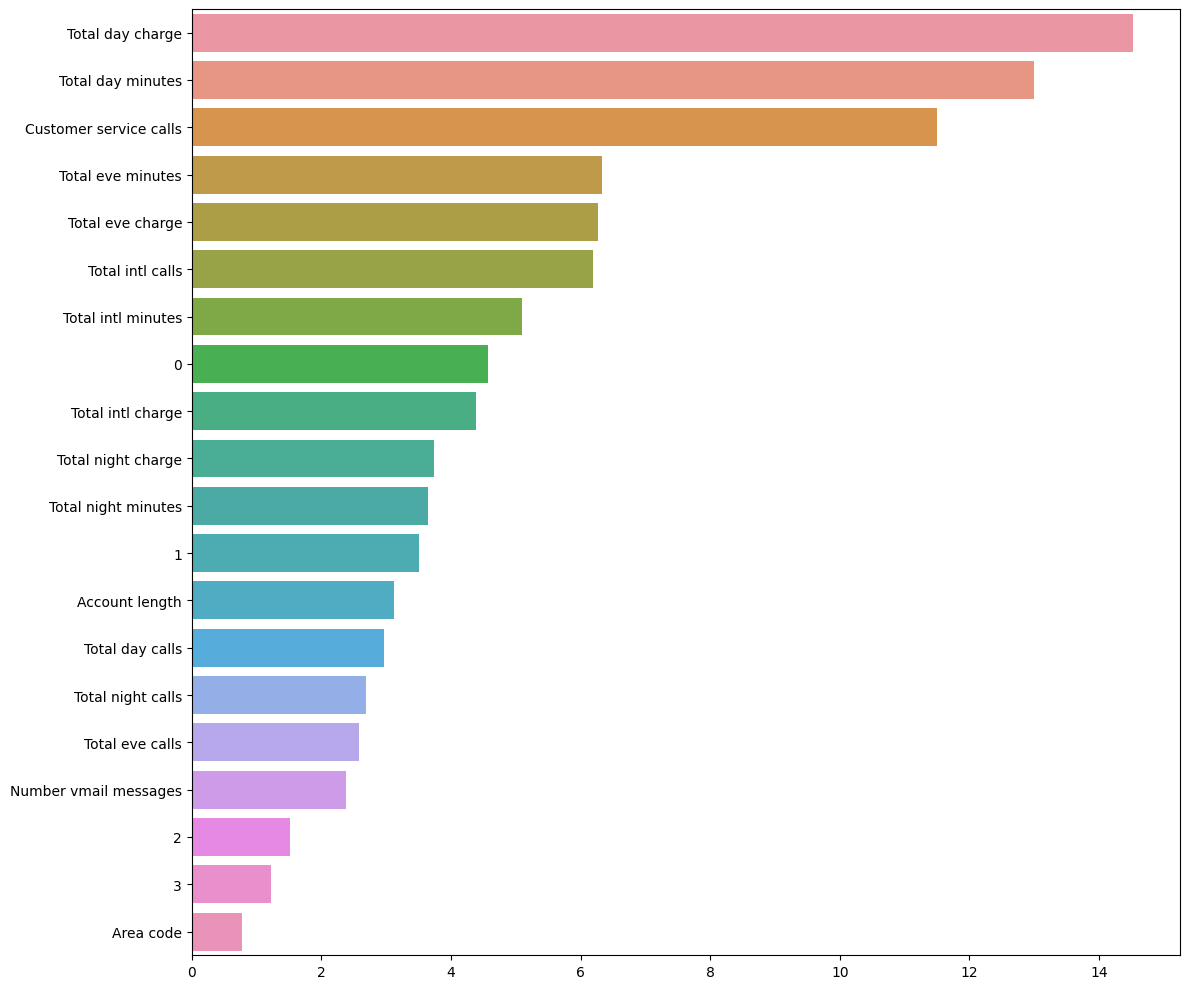

In [295]:
feature_imp_plot(churn_OH_encoded,label)

<b>Exercise 7:</b>

If we want to use a random forest to solve regression problems we can use the RandomForestRegressor from sklearn.
* Generate an easy regression data set using make_regression with 10 features. (use function make_regression)
* Split the data set into a train and test set.
* Train a model and report the training and testing mean square error (can be calculated using sklearn.metrics.mean_squared_error)

In [24]:
model = RandomForestRegressor()
X,y = make_regression(n_features = 10,n_informative = 8, random_state = 42, n_samples=10000)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.33, random_state = 42)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
print(mse(y_true = y_test, y_pred = y_pred,squared = False))

35.24466957000159


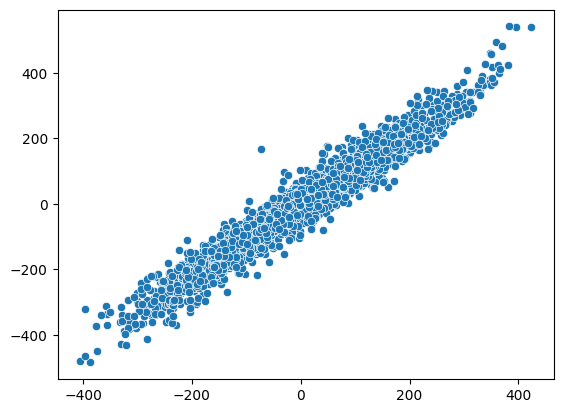

In [26]:
sns.scatterplot(x = y_pred,y = y_test)
plt.show()